In [2]:
import zipfile
import os


# path to zip file
zip_file_path = "archive.zip"

# needed directory
extract_to = "archive"

# extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction completed!")

# list the contents of the extraction directory
for root, dirs, files in os.walk(extract_to):
    for name in dirs:
        print(os.path.join(root, name))
    for name in files:
        print(os.path.join(root, name))


Extraction completed!
archive\tomato
archive\tomato\train
archive\tomato\val
archive\tomato\cnn_train.py
archive\tomato\train\Tomato___Bacterial_spot
archive\tomato\train\Tomato___Early_blight
archive\tomato\train\Tomato___healthy
archive\tomato\train\Tomato___Late_blight
archive\tomato\train\Tomato___Leaf_Mold
archive\tomato\train\Tomato___Septoria_leaf_spot
archive\tomato\train\Tomato___Spider_mites Two-spotted_spider_mite
archive\tomato\train\Tomato___Target_Spot
archive\tomato\train\Tomato___Tomato_mosaic_virus
archive\tomato\train\Tomato___Tomato_Yellow_Leaf_Curl_Virus
archive\tomato\train\Tomato___Bacterial_spot\00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG
archive\tomato\train\Tomato___Bacterial_spot\01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG
archive\tomato\train\Tomato___Bacterial_spot\05777829-6912-44bb-bcef-901bc5190584___GCREC_Bact.Sp 6150.JPG
archive\tomato\train\Tomato___Bacterial_spot\070228e2-ba4e-4de8-813b-074e51ed6f5a___UF.GRC_BS_Lab 

Data Visualization

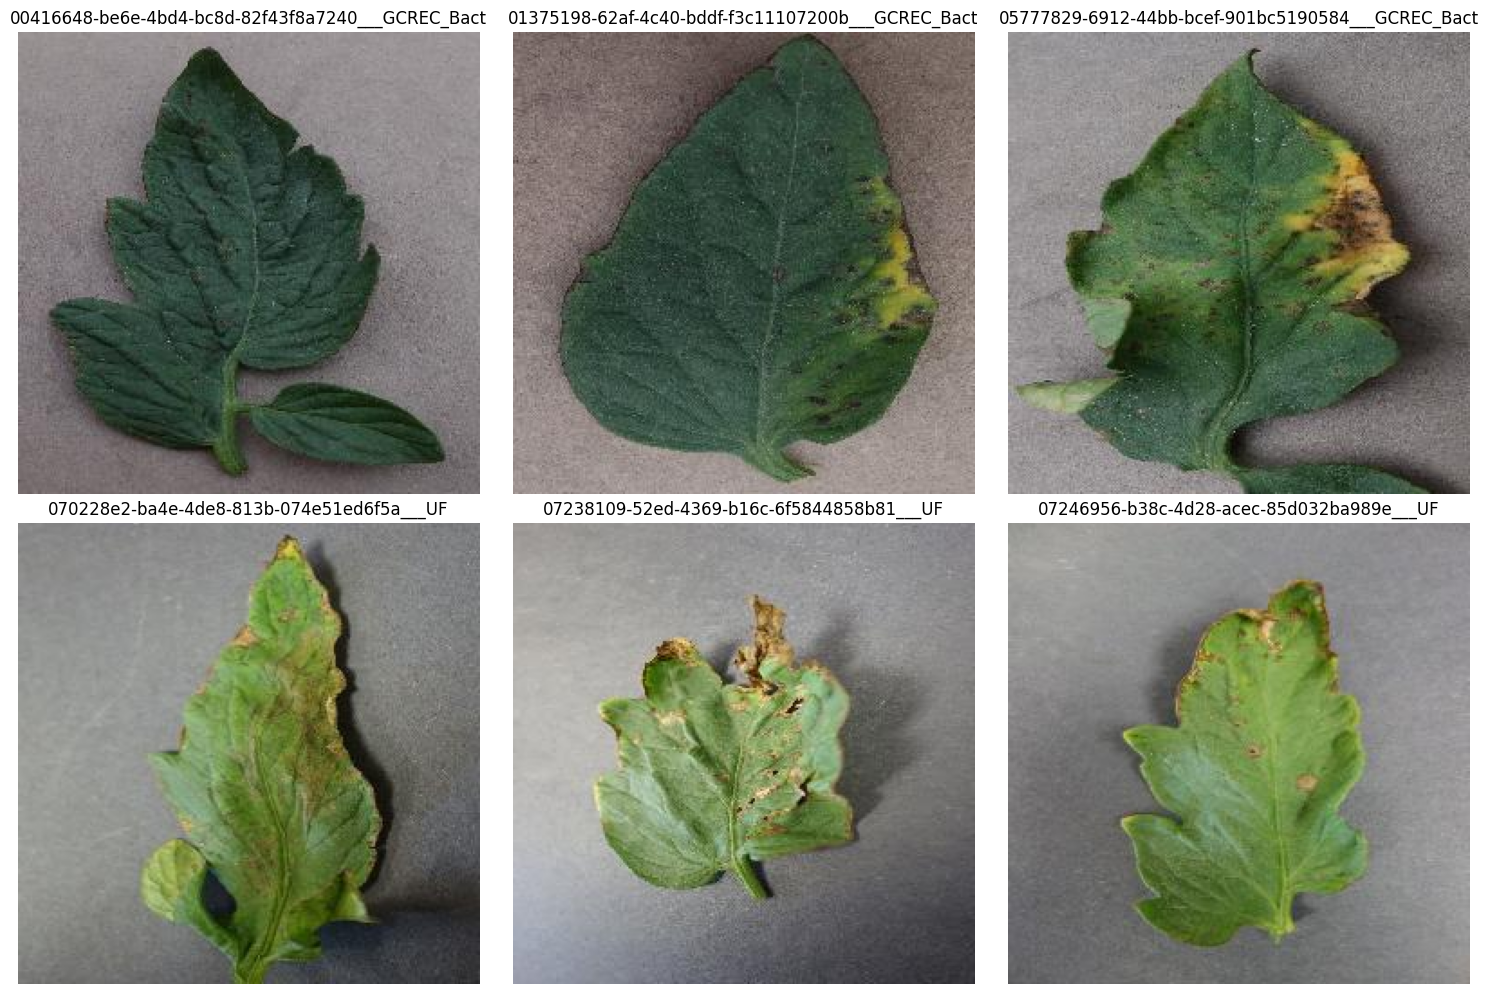

In [11]:

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
# path to image folder
path = "archive/tomato/train/Tomato___Bacterial_spot"

# get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

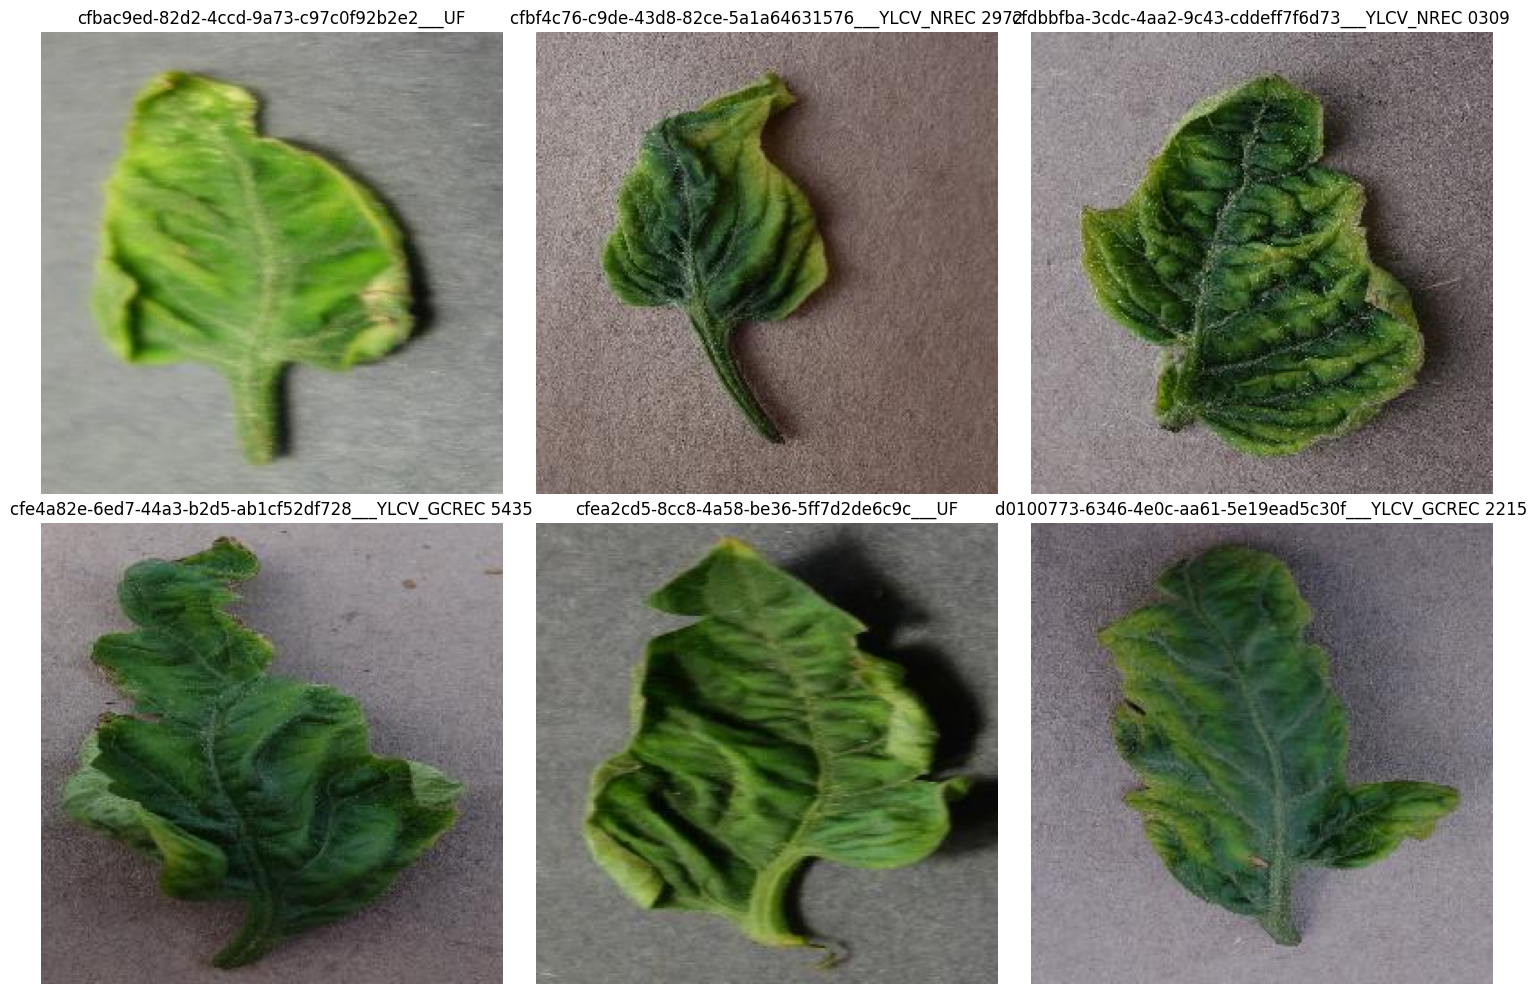

In [12]:
path = "archive/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus"

# get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

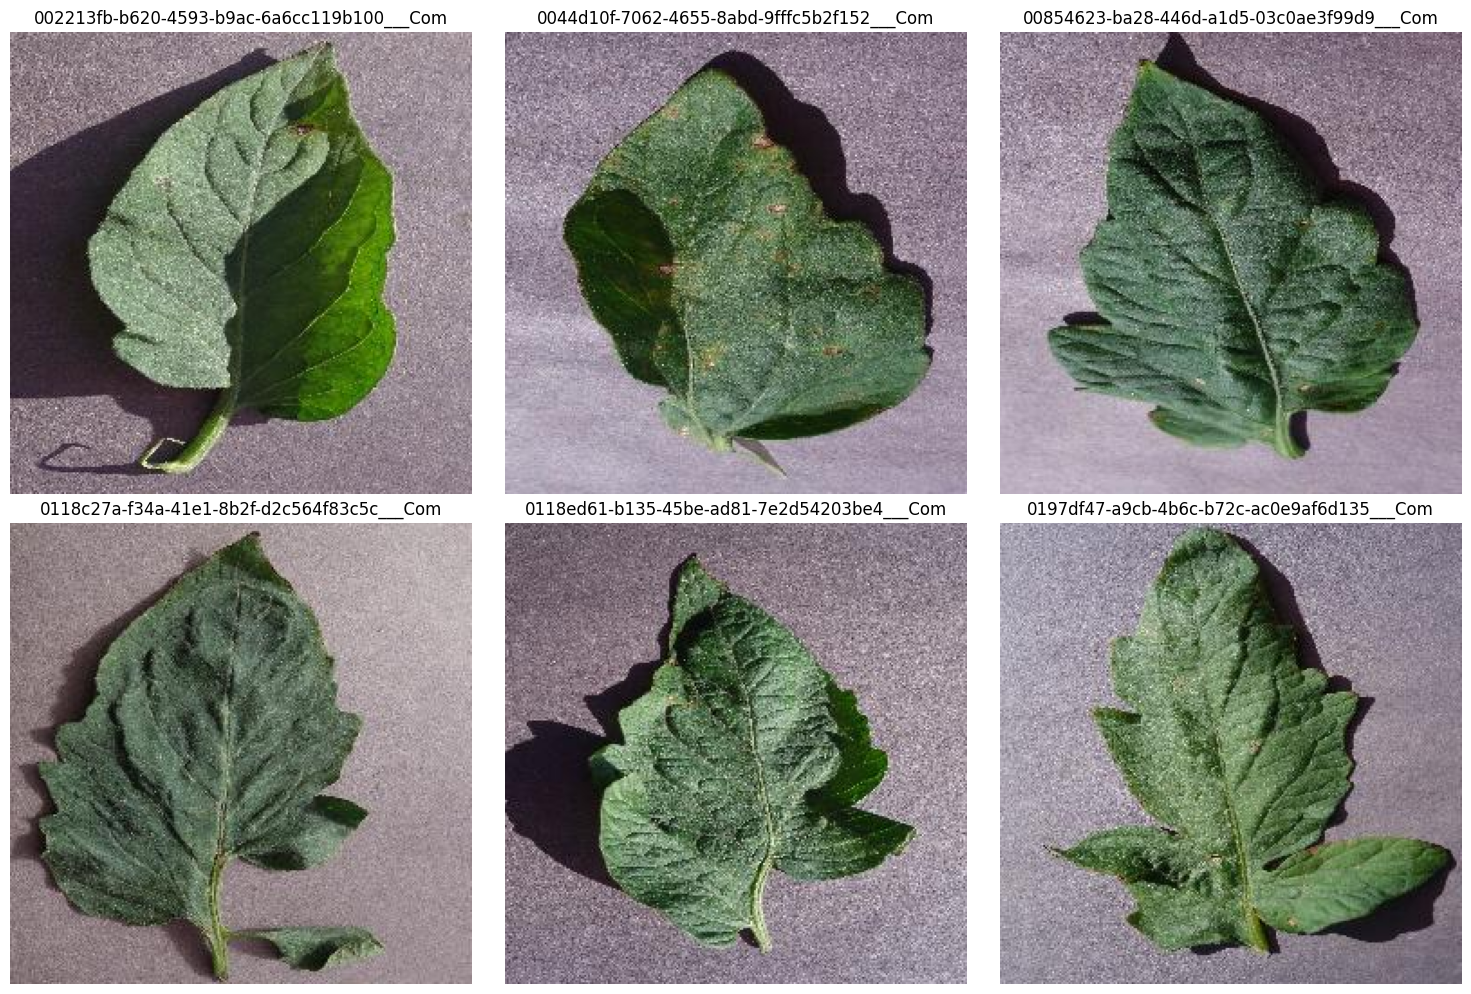

In [13]:
path = "archive/tomato/train/Tomato___Target_Spot"

# get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define the paths for training and validation datasets
train_dir = os.path.join(extract_to, 'tomato', 'train')
val_dir = os.path.join(extract_to, 'tomato', 'val')

# create ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'
)


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,802 (815.63 KB)

 Trainable params: 208,802 (815.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 686ms/step - accuracy: 0.0995 - loss: 2.2989 - val_accuracy: 0.2200 - val_loss: 2.2086
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 587ms/step - accuracy: 0.1987 - loss: 2.1720 - val_accuracy: 0.2650 - val_loss: 2.0391
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 565ms/step - accuracy: 0.2993 - loss: 1.9859 - val_accuracy: 0.4070 - val_loss: 1.6662
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 536ms/step - accuracy: 0.3655 - loss: 1.8043 - val_accuracy: 0.4810 - val_loss: 1.4835
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 538ms/step - accuracy: 0.4372 - loss: 1.6049 - val_accuracy: 0.5560 - val_loss: 1.3115
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 508ms/step - accuracy: 0.4389 - loss: 1.5711 - val_accuracy: 0.5210 - val_loss: 1.3032
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 582ms/step - accuracy: 0.5235 - loss: 1.3688 - val_accuracy: 0.5290 - val_loss: 1.2722
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 311ms/step - accuracy: 0.5150 - loss: 1.381

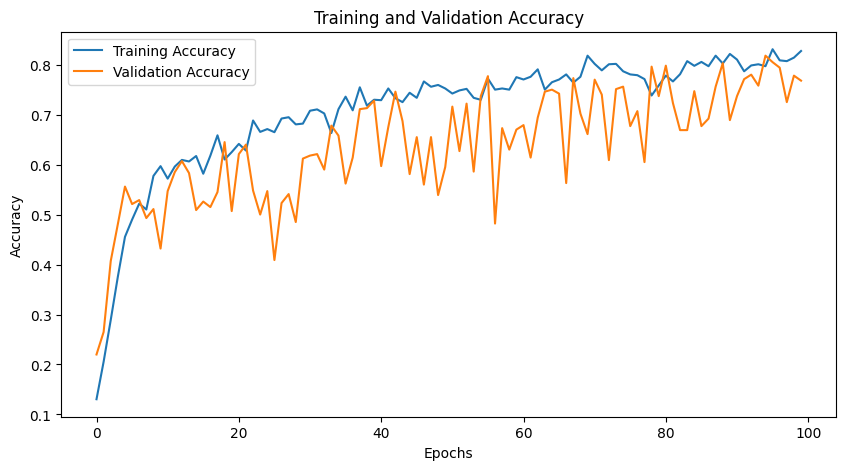

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Initialize the CNN
classifier = Sequential()

# Add convolutional and pooling layers
classifier.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(16, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(8, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
classifier.add(Flatten())

# Add a fully connected layer and dropout
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.5))

# Add the output layer
classifier.add(Dense(10, activation='softmax'))

# Compile the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(classifier.summary())

# Train the CNN
history = classifier.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=100, 
    validation_data=validation_generator,
    validation_steps=100
)

# Save the model weights
classifier.save_weights('keras_tomato_trained_model_trained.weights.h5')
print('Saved trained model as %s ' % 'keras_tomato_trained_model_trained.weights.h5')

# Generate and save learning curve plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('learning_curve.pdf')  # Save as PDF
plt.show()


In [8]:
evaluation = classifier.evaluate(validation_generator)

# print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7623 - loss: 0.7030
Validation Loss: 0.6535449624061584
Validation Accuracy: 0.7860000133514404
